#**Import Libraries and Define Expense Class**

In [ ]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

class Expense:
    def __init__(self, name, category, amount, date):
        self.name = name
        self.category = category
        self.amount = amount
        self.date = date

    def __lt__(self, other):
        return self.date < other.date


#**Get User Expense Input**

In [ ]:
def get_user_expense():
    print(f"🎯 Getting User Expense")
    expense_name = input("Enter expense name: ")
    expense_amount = float(input("Enter expense amount: "))
    expense_date = input("Enter expense date (YYYY-MM-DD): ")

    try:
        expense_date = datetime.datetime.strptime(expense_date, '%Y-%m-%d').date()
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")
        return None

    expense_categories = [
        "🍔 Food",
        "🏠 Home",
        "💼 Work",
        "🎉 Fun",
        "✨ Misc",
    ]

    while True:
        print("Select a category: ")
        for i, category_name in enumerate(expense_categories):
            print(f"  {i + 1}. {category_name}")

        value_range = f"[1 - {len(expense_categories)}]"
        selected_index = int(input(f"Enter a category number {value_range}: ")) - 1

        if selected_index in range(len(expense_categories)):
            selected_category = expense_categories[selected_index]
            new_expense = Expense(
                name=expense_name, category=selected_category, amount=expense_amount, date=expense_date
            )
            return new_expense
        else:
            print("Invalid category. Please try again.")


#**Save Expense to File**

In [ ]:
def save_expense_to_file(expense, expense_file_path):
    print(f"🎯 Saving Expense to File")
    with open(expense_file_path, "a") as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(["Name", "Amount", "Category", "Date"])
        writer.writerow([expense.name, expense.amount, expense.category, expense.date])
    print("Expense saved successfully")


#**Summarize Expenses**

In [ ]:
def summarize_expenses(expense_file_path):
    print(f"🎯 Summarizing User Expenses")
    expenses = []

    categorized_expenses = {
        "🍔 Food": [],
        "🏠 Home": [],
        "💼 Work": [],
        "🎉 Fun": [],
        "✨ Misc": [],
    }

    expenses_by_month = {}
    expenses_by_date = {}

    with open(expense_file_path, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        header = next(reader) #skip
        for row in reader:
            expense_name, expense_amount, expense_category, expense_date = row
            line_expense = Expense(
                name=expense_name,
                category=expense_category,
                amount=float(expense_amount),
                date=datetime.datetime.strptime(expense_date, '%Y-%m-%d').date()
            )
            expenses.append(line_expense)
            categorized_expenses[expense_category].append(line_expense)

            month_key = line_expense.date.strftime('%Y-%m')
            if month_key in expenses_by_month:
                expenses_by_month[month_key] += line_expense.amount
            else:
                expenses_by_month[month_key] = line_expense.amount

            if line_expense.date in expenses_by_date:
                expenses_by_date[line_expense.date] += line_expense.amount
            else:
                expenses_by_date[line_expense.date] = line_expense.amount

    # Create a DataFrame for the monthly report
    monthly_report = pd.DataFrame(list(expenses_by_month.items()), columns=['Month', 'Total_Expense'])
    monthly_report['Month'] = pd.to_datetime(monthly_report['Month'])
    monthly_report = monthly_report.sort_values(by='Month')

    total_spent = sum([x.amount for x in expenses])
    #remaining_budget = budget - total_spent

    print(f"💵 Total Spent: ${total_spent:.2f}")
    #print(f"✅ Budget Remaining: ${remaining_budget:.2f}")

    # Save total expenses by date to a file
    with open('total_expenses_by_date.csv', 'w') as total_file:
        total_writer = csv.writer(total_file)
        total_writer.writerow(['Date', 'Total_Expense'])
        for date, total_amount in expenses_by_date.items():
            total_writer.writerow([date.strftime('%Y-%m-%d'), total_amount])

    print("Total expenses by date saved to 'total_expenses_by_date.csv'")

    return categorized_expenses, monthly_report


#**Printing Last 5 Expenses**

In [ ]:
def print_last_5_expenses(categorized_expenses):
    for category, expenses_list in categorized_expenses.items():
        # Sort expenses in descending order by date
        sorted_expenses = sorted(expenses_list, key=lambda x: x.date, reverse=True)

        print(f"\nLast 5 Expenses in {category} (Sorted by Date):")

        # Print the last five expenses
        for exp in sorted_expenses[:5]:
            print(f"  Date: {exp.date}, Name: {exp.name}, Amount: ${exp.amount:.2f}")


#**Show Monthly Report**

In [ ]:
def show_monthly_report(monthly_report):
    print("Monthly Expense Report:")
    print(monthly_report)

    # Visualization (optional): Plotting the monthly expenses
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_report['Month'], monthly_report['Total_Expense'], marker='o')
    plt.title("Monthly Expense Report")
    plt.xlabel("Month")
    plt.ylabel("Total Expense")
    plt.xticks(rotation=45)
    plt.show()


#**Execute Functions and Display Results**

In [ ]:
# User Interaction
print(f"🎯 Running Expense Tracker!")
expense_file_path = "expenses.csv"
#budget = 2000
expenses = []

while True:
    choice = input("Do you want to enter a new expense? (yes/no): ")
    if choice.lower() == "yes":
        expense = get_user_expense()
        if expense is not None:
            expenses.append(expense)
            save_expense_to_file(expense, expense_file_path)
    elif choice.lower() == "no":
        break
    else:
        print("Invalid choice. Please enter 'yes' or 'no'.")


🎯 Running Expense Tracker!
Do you want to enter a new expense? (yes/no): no


#**Showing the expenses Summarize and Monthly Report**

🎯 Summarizing User Expenses
💵 Total Spent: $200483.24
Total expenses by date saved to 'total_expenses_by_date.csv'
Monthly Expense Report:
        Month  Total_Expense
0  2021-01-01        5214.80
1  2021-02-01        5745.14
2  2021-03-01        4683.69
3  2021-04-01        5777.45
4  2021-05-01        5737.72
5  2021-06-01        5593.95
6  2021-07-01        5163.80
7  2021-08-01        5105.85
8  2021-09-01        4900.00
9  2021-10-01        4936.32
10 2021-11-01        5643.43
11 2021-12-01        5211.60
12 2022-01-01        6149.01
13 2022-02-01        5897.93
14 2022-03-01        5170.94
15 2022-04-01        5860.32
16 2022-05-01        5280.26
17 2022-06-01        5514.43
18 2022-07-01        5930.28
19 2022-08-01        5105.34
20 2022-09-01        5630.84
21 2022-10-01        5127.62
22 2022-11-01        5863.81
23 2022-12-01        6130.98
24 2023-01-01        6003.73
25 2023-02-01        6024.88
26 2023-03-01        5713.32
27 2023-04-01        5950.15
28 2023-05-01       

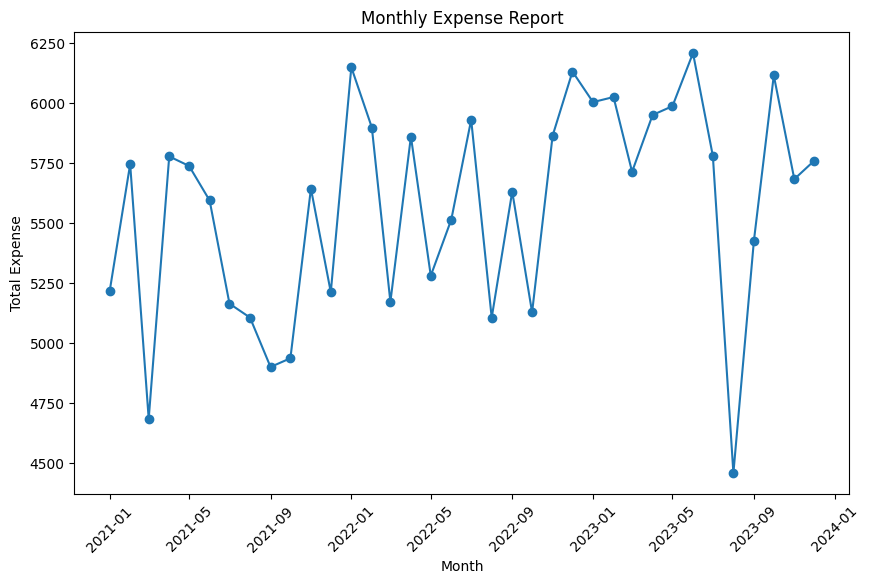

In [ ]:
categorized_expenses, monthly_report = summarize_expenses(expense_file_path)

show_monthly_report(monthly_report)



#**Printing Last 5 Expenses for each category**

In [ ]:
print_last_5_expenses(categorized_expenses)


Last 5 Expenses in 🍔 Food (Sorted by Date):
  Date: 2023-12-28, Name: Expense on 🍔 Food, Amount: $99.27
  Date: 2023-12-27, Name: Expense on 🍔 Food, Amount: $142.32
  Date: 2023-12-26, Name: Expense on 🍔 Food, Amount: $6.33
  Date: 2023-12-25, Name: Expense on 🍔 Food, Amount: $13.55
  Date: 2023-12-24, Name: Expense on 🍔 Food, Amount: $102.17

Last 5 Expenses in 🏠 Home (Sorted by Date):
  Date: 2023-12-28, Name: Expense on 🏠 Home, Amount: $9.82
  Date: 2023-12-27, Name: Expense on 🏠 Home, Amount: $18.09
  Date: 2023-12-26, Name: Expense on 🏠 Home, Amount: $5.28
  Date: 2023-12-25, Name: Expense on 🏠 Home, Amount: $11.71
  Date: 2023-12-24, Name: Expense on 🏠 Home, Amount: $14.29

Last 5 Expenses in 💼 Work (Sorted by Date):
  Date: 2023-12-28, Name: Expense on 💼 Work, Amount: $16.09
  Date: 2023-12-27, Name: Expense on 💼 Work, Amount: $17.83
  Date: 2023-12-26, Name: Expense on 💼 Work, Amount: $10.24
  Date: 2023-12-25, Name: Expense on 💼 Work, Amount: $30.54
  Date: 2023-12-24, Name: 

#**Showing expense on each days**

In [ ]:
file_path1 = '/content/total_expenses_by_date.csv'
df1 = pd.read_csv(file_path1)
df1

,Date,Total_Expense
0,2021-01-01,110.69
1,2021-01-02,109.94
2,2021-01-03,316.67
3,2021-01-04,187.87
4,2021-01-05,280.23
...,...,...
1003,2023-12-24,168.33
1004,2023-12-25,199.07
1005,2023-12-26,90.13
1006,2023-12-27,274.56


# **Read the data from the CSV file**

In [ ]:
file_path = '/content/expenses.csv'
df = pd.read_csv(file_path)
df

,Name,Amount,Category,Date
0,Expense on 🍔 Food,33.11,🍔 Food,2021-01-01
1,Expense on 🏠 Home,14.96,🏠 Home,2021-01-01
2,Expense on 💼 Work,12.00,💼 Work,2021-01-01
3,Expense on 🎉 Fun,46.02,🎉 Fun,2021-01-01
4,Expense on ✨ Misc,4.60,✨ Misc,2021-01-01
...,...,...,...,...
5035,Expense on 🍔 Food,99.27,🍔 Food,2023-12-28
5036,Expense on 🏠 Home,9.82,🏠 Home,2023-12-28
5037,Expense on 💼 Work,16.09,💼 Work,2023-12-28
5038,Expense on 🎉 Fun,110.10,🎉 Fun,2023-12-28


#**Columns**

In [ ]:
df.columns

Index(['Name', 'Amount', 'Category', 'Date'], dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5040 non-null   object 
 1   Amount    5040 non-null   float64
 2   Category  5040 non-null   object 
 3   Date      5040 non-null   object 
dtypes: float64(1), object(3)
memory usage: 157.6+ KB


In [ ]:
df['Amount'].describe()

count    5040.000000
mean       39.778421
std        44.296204
min         0.010000
25%         8.827500
50%        17.870000
75%        59.430000
max       159.880000
Name: Amount, dtype: float64

# **Total Amount Spent by Category (Bar Chart)**

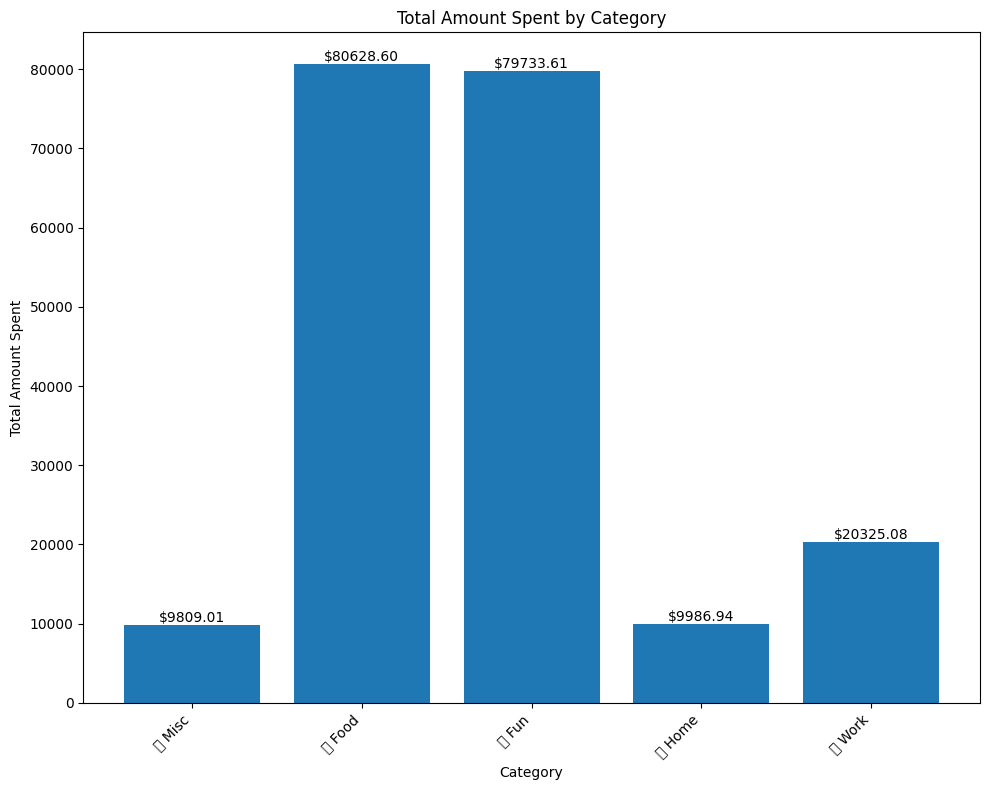

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar chart
plt.figure(figsize=(10,8))

# Group the data by category and sum the amounts
category_grouped = df.groupby('Category')['Amount'].sum().reset_index()

# Create the bar chart
plt.bar(category_grouped['Category'], category_grouped['Amount'])
plt.xlabel("Category")
plt.ylabel("Total Amount Spent")
plt.title("Total Amount Spent by Category")
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the exact amounts
for i, row in category_grouped.iterrows():
    plt.text(i, row['Amount'], f"${row['Amount']:.2f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()


# **Expense Distribution by Category (Pie Chart)**

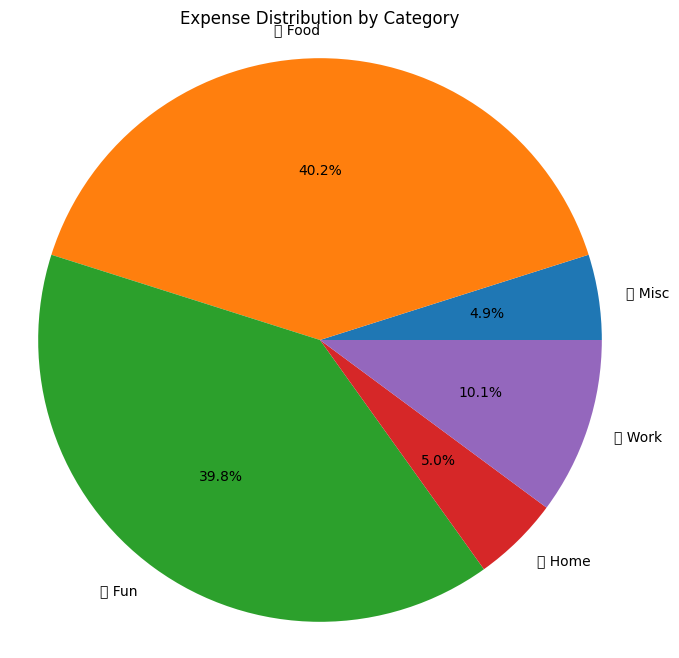

In [ ]:
# Calculate the total amount spent in each category
category_grouped = df.groupby('Category')['Amount'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_grouped, labels=category_grouped.index, autopct='%1.1f%%')
plt.title('Expense Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# **Expense Amount Distribution (Histogram)**

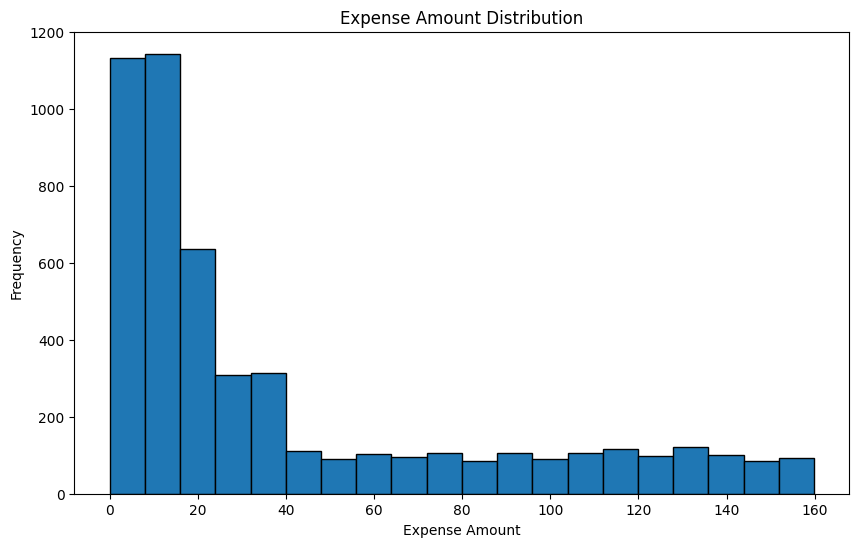

In [ ]:
# Create a histogram of expense amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=20, edgecolor='k')
plt.xlabel('Expense Amount')
plt.ylabel('Frequency')
plt.title('Expense Amount Distribution')
plt.show()


# **Expense Over Time (Scatter Plot)**

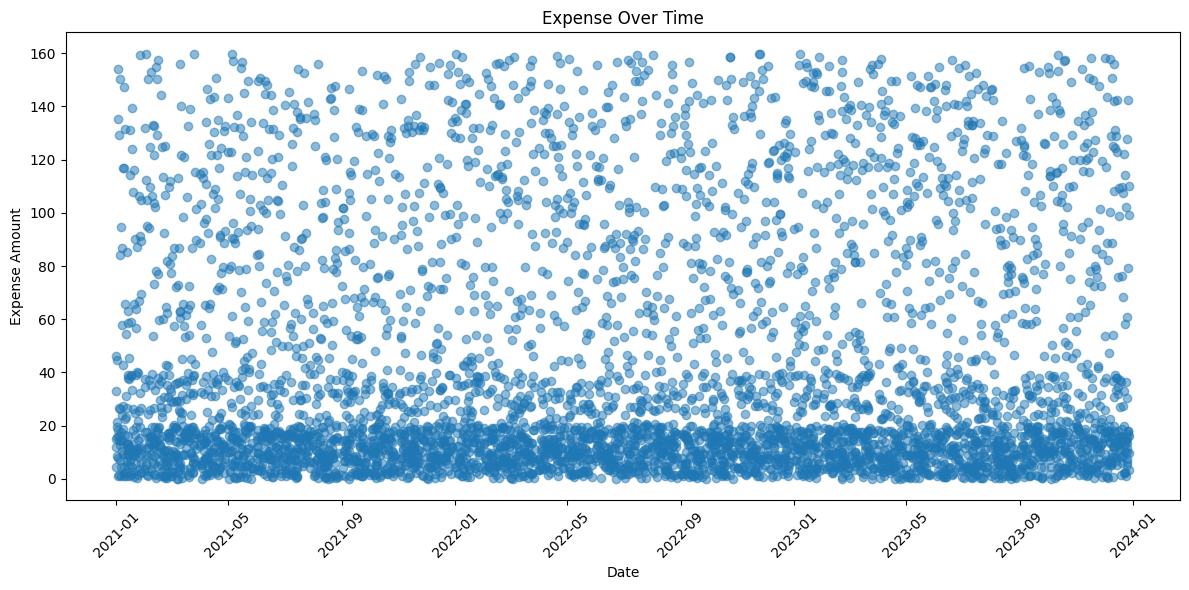

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Create a scatter plot of expenses over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Amount'], marker='o', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Expense Amount')
plt.title('Expense Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Data Preprocessing for Expenditure Prediction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

data = pd.read_csv('expenses.csv')

data['Date'] = pd.to_datetime(data['Date'])

monthly_expenses = data.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()

monthly_expenses_pivot = monthly_expenses.pivot_table(index='Date', columns='Category', values='Amount', aggfunc='sum', fill_value=0)

monthly_expenses_pivot_reset = monthly_expenses_pivot.reset_index()

monthly_expenses_pivot_reset['Date'] = monthly_expenses_pivot_reset['Date'].dt.strftime('%Y-%m')

# **Feature Engineering**

In [ ]:
# Calculate total expenses for each month
monthly_expenses_pivot_reset['Total_Expenses'] = monthly_expenses_pivot_reset.drop(columns=['Date']).sum(axis=1)

# total expenses
X = monthly_expenses_pivot_reset[['Total_Expenses']]

# expenses for different categories
y = monthly_expenses_pivot_reset.drop(columns=['Date', 'Total_Expenses'])

# Save the features and target variables for further use
X.to_csv('features.csv', index=False)
y.to_csv('targets.csv', index=False)

print(pd.read_csv('features.csv'))
print(pd.read_csv('targets.csv'))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    Total_Expenses
0          5214.80
1          5745.14
2          4683.69
3          5777.45
4          5737.72
5          5593.95
6          5163.80
7          5105.85
8          4900.00
9          4936.32
10         5643.43
11         5211.60
12         6149.01
13         5897.93
14         5170.94
15         5860.32
16         5280.26
17         5514.43
18         5930.28
19         5105.34
20         5630.84
21         5127.62
22         5863.81
23         6130.98
24         6003.73
25         6024.88
26         5713.32
27         5950.15
28         5986.89
29         6208.09
30         5779.11
31         4457.85
32         5426.65
33         6114.93
34         5682.76
35         5759.37
    ✨ Misc   🍔 Food    🎉 Fun  🏠 Home  💼 Work
0   237.87  1948.52  2170.61  279.58  578.22
1   263.35  2500.01  2096.97  313.15  571.66
2   252.24  1975.36  1523.83  318.59  613.67
3   256.93  2459.36  2192.18  291.64  577.34
4   232.91  2089.80  2547.63  301.12  566.26
5   317.25  2128.76  2283.8

# **Support Vector Machine (SVM)**

Performance of Support Vector Machine (SVM) Model:
✨ Misc: -0.02783066929997391
🍔 Food: 0.11705486112559926
🎉 Fun: 0.003077286314773442
🏠 Home: 0.2102770172755173
💼 Work: -0.022322546752525874

Mean R2 Score SVM: 0.056051189732678044

Predicted Budget Distribution using Support Vector Machine (SVM):
✨ Misc: 278.42
🍔 Food: 2250.82
🎉 Fun: 2205.52
🏠 Home: 275.91
💼 Work: 573.20


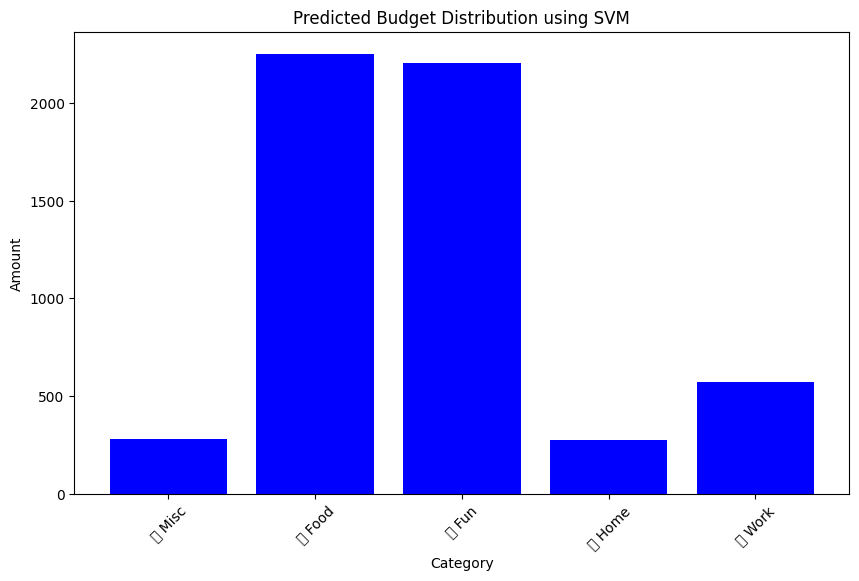

In [ ]:
print("Performance of Support Vector Machine (SVM) Model:")

# Train a separate model for each category using Support Vector Machine (SVM) regressor
models_svm = {}
for category in y_train.columns:
    model_svm = SVR()
    model_svm.fit(X_train, y_train[category])
    models_svm[category] = model_svm

r2_scores_svm = {}
for category, model_svm in models_svm.items():
    y_pred_svm = model_svm.predict(X_test)
    r2_scores_svm[category] = r2_score(y_test[category], y_pred_svm)

# Print the R2 scores for each category using SVM
for category, r2_svm in r2_scores_svm.items():
    print(f"{category}: {-1 * r2_svm}")

# Calculate the mean R2 score across all categories
mean_r2_score_svm = sum(r2_scores_svm.values()) / len(r2_scores_svm)

# Print the mean R2 score
print(f"\nMean R2 Score SVM: {-1 * mean_r2_score_svm}")


# Predict the distributed expenditure for the given total budget using SVM
total_budget = 6000
input_data = [[total_budget]]
budget_distribution_svm = {}
for category, model_svm in models_svm.items():
    budget_distribution_svm[category] = model_svm.predict(input_data)

# Print the predicted budget distribution using SVM
print("\nPredicted Budget Distribution using Support Vector Machine (SVM):")
for category, budget in budget_distribution_svm.items():
    print(f"{category}: {budget[0]:.2f}")

# Plot the predicted budget distribution using SVM
plt.figure(figsize=(10, 6))
categories = list(budget_distribution_svm.keys())
budget_amounts = [budget_distribution_svm[category][0] for category in categories]
plt.bar(categories, budget_amounts, color='blue')
plt.title('Predicted Budget Distribution using SVM')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# **MultiOutputRegressor**


MultiOutputRegressor Model:
R2 Score: 0.13741666123632781

Predicted Budget Distribution using Gradient Boosting:
✨ Misc: 283.47
🍔 Food: 2228.69
🎉 Fun: 2660.32
🏠 Home: 292.65
💼 Work: 541.03


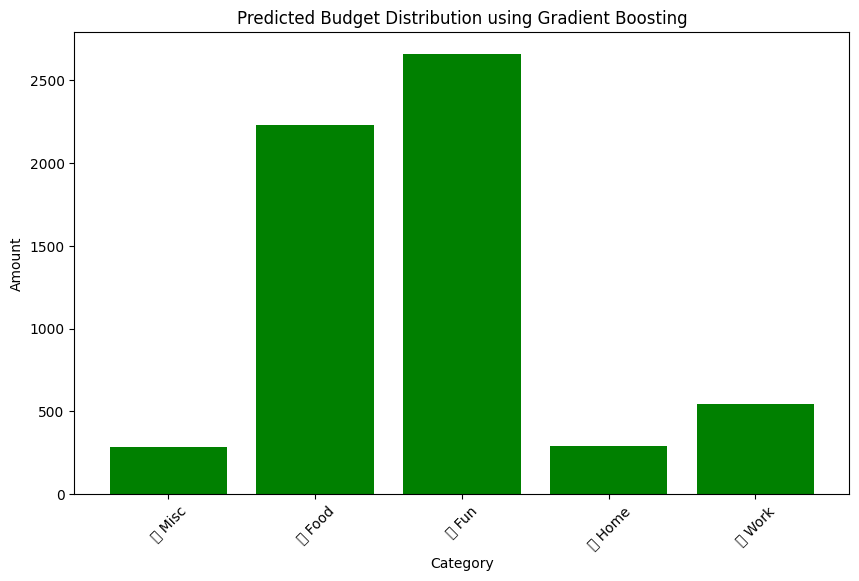

In [ ]:
print("\nMultiOutputRegressor Model:")

# Train a multi-output regression model using Gradient Boosting
model_gb = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
model_gb.fit(X_train, y_train)

r2_score_gb = model_gb.score(X_test, y_test)

# Print the R2 score for the model
print(f"R2 Score: {-1 * r2_score_gb}")

budget_distribution_gb = model_gb.predict([[total_budget]])

# Print the predicted budget distribution using Gradient Boosting
print("\nPredicted Budget Distribution using Gradient Boosting:")
for category, budget in zip(y.columns, budget_distribution_gb[0]):
    print(f"{category}: {budget:.2f}")

# Plot the predicted budget distribution using Gradient Boosting
plt.figure(figsize=(10, 6))
plt.bar(y.columns, budget_distribution_gb[0], color='green')
plt.title('Predicted Budget Distribution using Gradient Boosting')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# **Random Forest Model**


Random Forest Model:
✨ Misc: 0.12162751251672488
🍔 Food: 0.31092436729915574
🎉 Fun: 0.45508211250699315
🏠 Home: -0.4472362314208249
💼 Work: 0.3381175482362426

Predicted Budget Distribution using Random Forest:
✨ Misc: 267.51
🍔 Food: 2367.58
🎉 Fun: 2529.15
🏠 Home: 287.86
💼 Work: 546.64


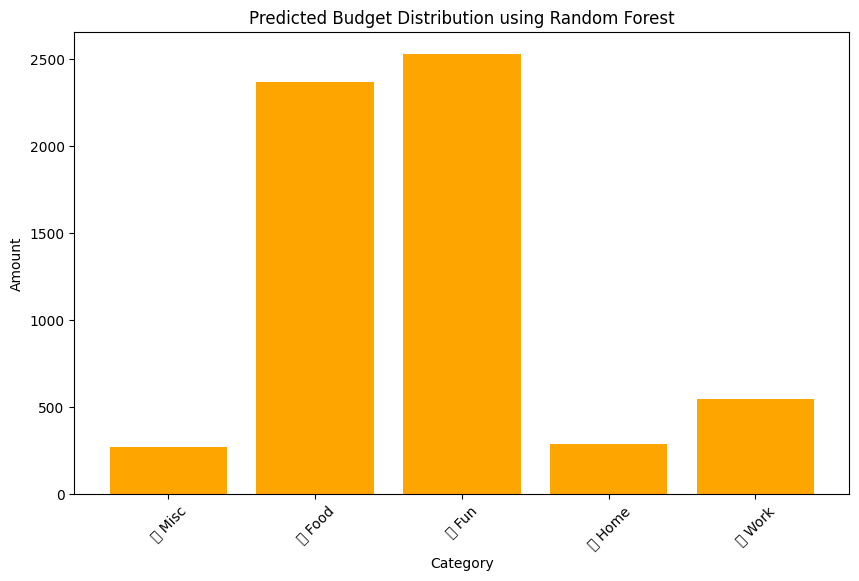

In [ ]:
print("\nRandom Forest Model:")

# Train a separate model for each category using Random Forest Regressor
models_rf = {}
for category in y_train.columns:
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train[category])
    models_rf[category] = model_rf

r2_scores_rf = {}
for category, model_rf in models_rf.items():
    y_pred_rf = model_rf.predict(X_test)
    r2_scores_rf[category] = r2_score(y_test[category], y_pred_rf)

# Print the R2 scores for each category using Random Forest Regressor
for category, r2_rf in r2_scores_rf.items():
    print(f"{category}: {r2_rf}")

# Predict the distributed expenditure for the given total budget using Random Forest Regressor
budget_distribution_rf = {}
for category, model_rf in models_rf.items():
    budget_distribution_rf[category] = model_rf.predict([[total_budget]])

# Print the predicted budget distribution using Random Forest Regressor
print("\nPredicted Budget Distribution using Random Forest:")
for category, budget in budget_distribution_rf.items():
    print(f"{category}: {budget[0]:.2f}")

# Plot the predicted budget distribution using Random Forest
plt.figure(figsize=(10, 6))
plt.bar(budget_distribution_rf.keys(), [budget[0] for budget in budget_distribution_rf.values()], color='orange')
plt.title('Predicted Budget Distribution using Random Forest')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate the mean R2 score across all categories
mean_r2_score_rf = sum(r2_scores_rf.values()) / len(r2_scores_rf)

# Print the mean R2 score
print(f"\nMean R2 Score using Random Forest Regressor: {mean_r2_score_rf}")



Mean R2 Score using Random Forest Regressor: 0.1557030618276583


# **Comparison of all models**


Comparison of Predicted Budget Distribution:


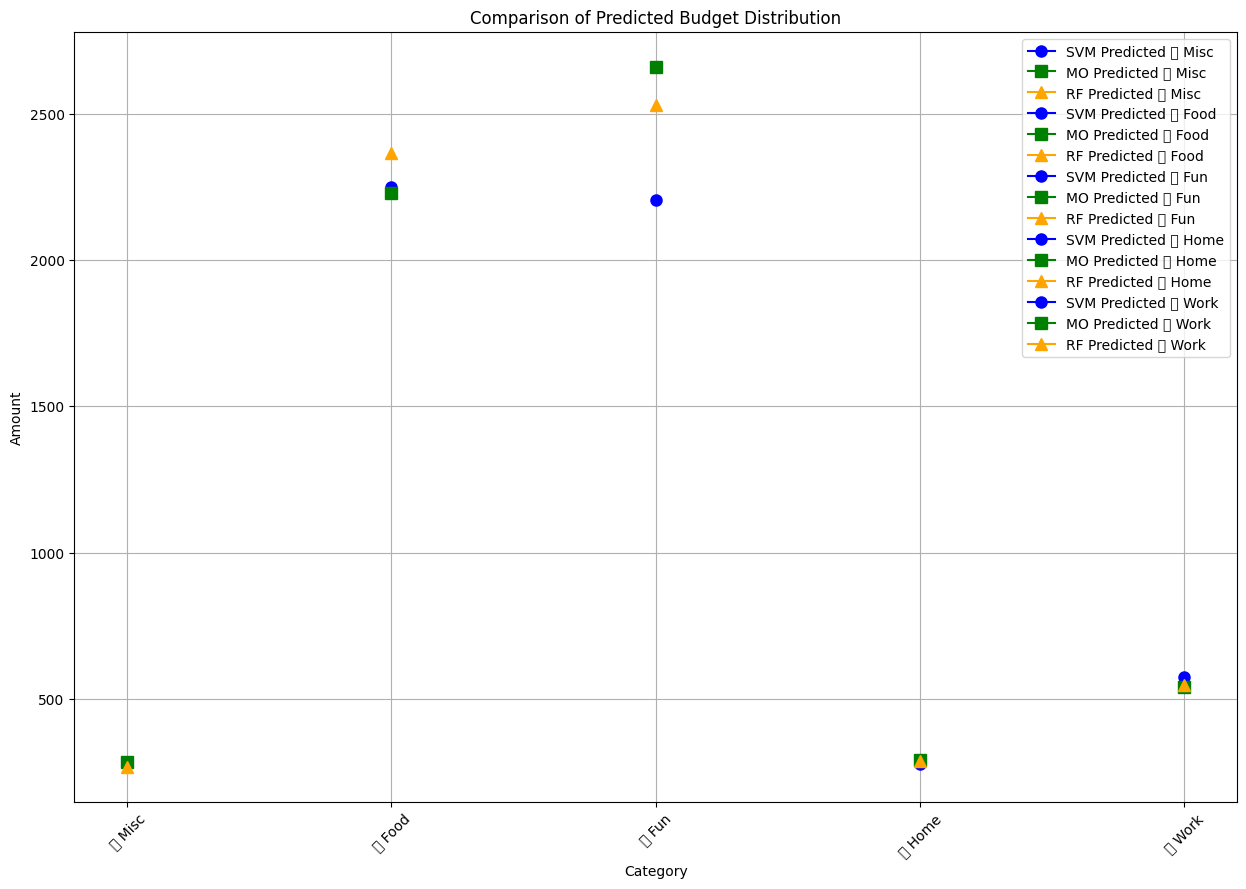

In [ ]:
# Comparison of all models
print("\nComparison of Predicted Budget Distribution:")

# Plot the predicted budget distribution for each model
plt.figure(figsize=(15, 10))
for category in y_test.columns:
    # SVM
    plt.plot([category], budget_distribution_svm[category], marker='o', markersize=8, label=f'SVM Predicted {category}', linestyle='-', color='blue')
    # Gradient Boosting
    plt.plot([category], budget_distribution_gb[0][list(y.columns).index(category)], marker='s', markersize=8, label=f'MO Predicted {category}', linestyle='-', color='green')
    # Random Forest
    plt.plot([category], budget_distribution_rf[category][0], marker='^', markersize=8, label=f'RF Predicted {category}', linestyle='-', color='orange')

plt.title('Comparison of Predicted Budget Distribution')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Apply K-means clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


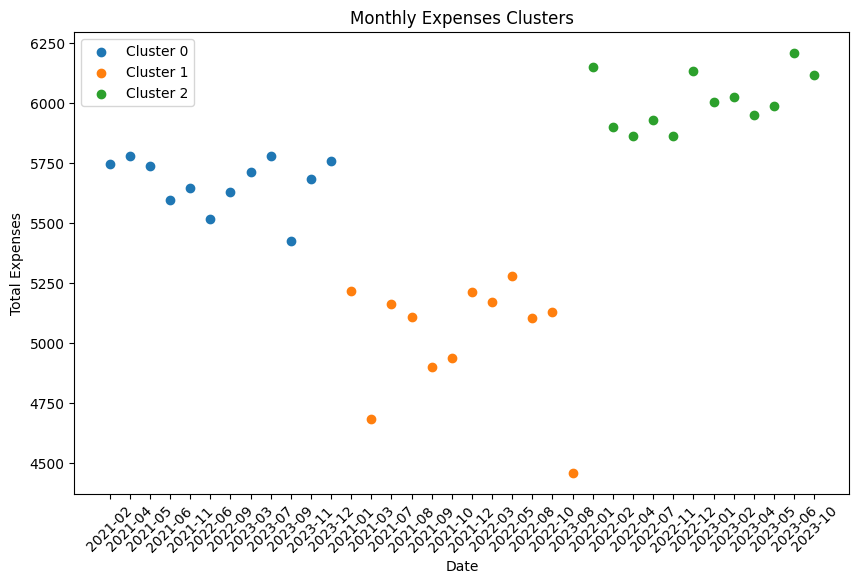


Cluster 0 Summary:
Category     ✨ Misc      🍔 Food        🎉 Fun      🏠 Home      💼 Work  \
count      12.00000    12.00000    12.000000   12.000000   12.000000   
mean      273.01750  2254.65250  2284.552500  281.438333  573.353333   
std        35.64405   211.76383   196.945064   39.433013   37.877226   
min       228.07000  1965.76000  1987.810000  217.520000  519.840000   
25%       249.87000  2086.75250  2123.220000  258.567500  545.740000   
50%       265.09000  2256.00000  2252.135000  289.865000  569.725000   
75%       301.30500  2443.04000  2438.047500  313.605000  595.872500   
max       327.87000  2503.46000  2598.510000  329.970000  640.630000   

Category  Total_Expenses  Cluster  
count          12.000000     12.0  
mean         5667.014167      0.0  
std           110.801332      0.0  
min          5426.650000      0.0  
25%          5621.617500      0.0  
50%          5698.040000      0.0  
75%          5748.697500      0.0  
max          5779.110000      0.0  

Cluste

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
monthly_expenses_pivot_reset['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(monthly_expenses_pivot_reset['Cluster'].unique()):
    cluster_data = monthly_expenses_pivot_reset[monthly_expenses_pivot_reset['Cluster'] == cluster]
    plt.scatter(cluster_data['Date'], cluster_data['Total_Expenses'], label=f'Cluster {cluster}')
plt.title('Monthly Expenses Clusters')
plt.xlabel('Date')
plt.ylabel('Total Expenses')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Analyze each cluster
for cluster in sorted(monthly_expenses_pivot_reset['Cluster'].unique()):
    cluster_data = monthly_expenses_pivot_reset[monthly_expenses_pivot_reset['Cluster'] == cluster]
    print(f'\nCluster {cluster} Summary:')
    print(cluster_data.describe())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


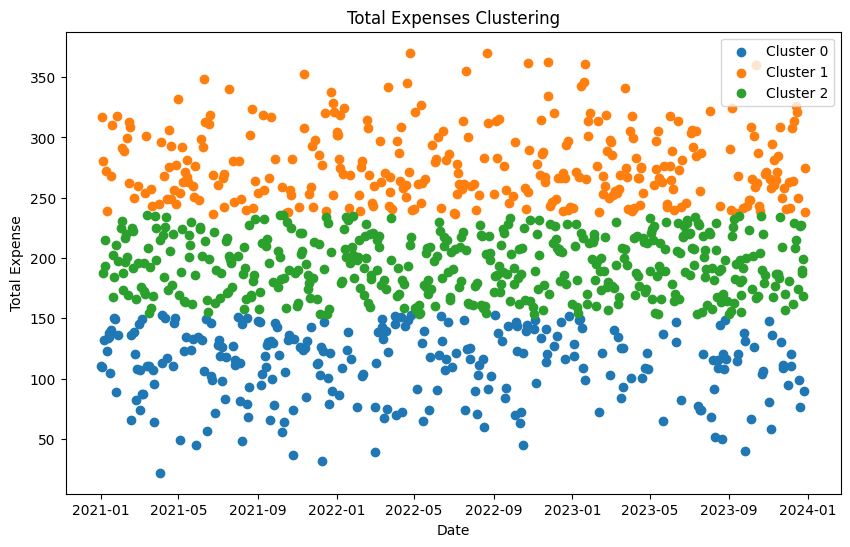

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/total_expenses_by_date.csv")

# Parse the date column
data['Date'] = pd.to_datetime(data['Date'])

# Extract total expenses
X = data['Total_Expense'].values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 3

# Train the K-means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to data points
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(data[data['Cluster'] == cluster]['Date'], data[data['Cluster'] == cluster]['Total_Expense'], label=f'Cluster {cluster}')
plt.xlabel('Date')
plt.ylabel('Total Expense')
plt.title('Total Expenses Clustering')
plt.legend()
plt.show()


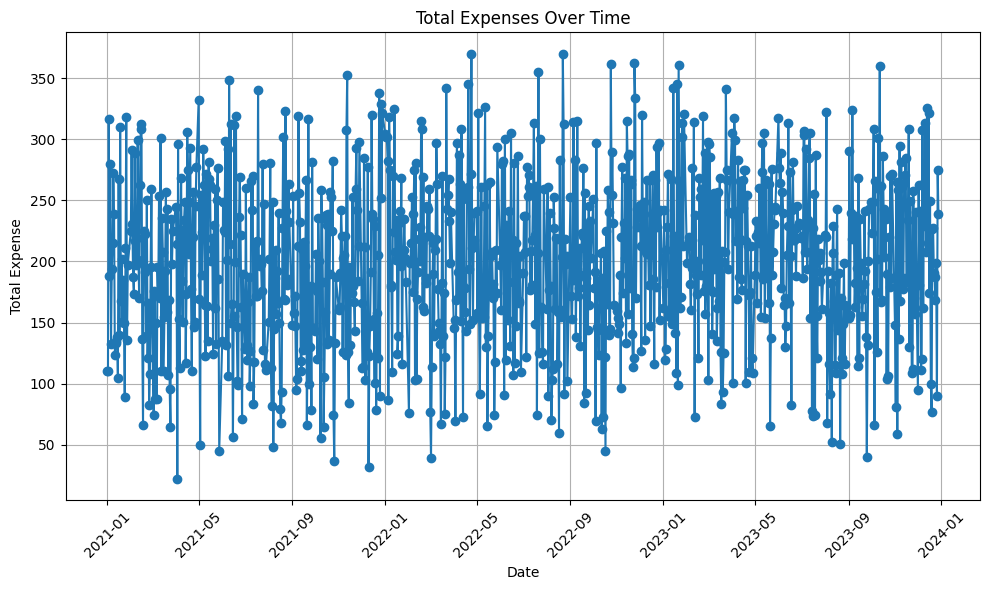

In [ ]:
# Assuming the dataset is stored in a CSV file named 'expenses.csv'
data = pd.read_csv('/content/total_expenses_by_date.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Total_Expense'], marker='o', linestyle='-')
plt.title('Total Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


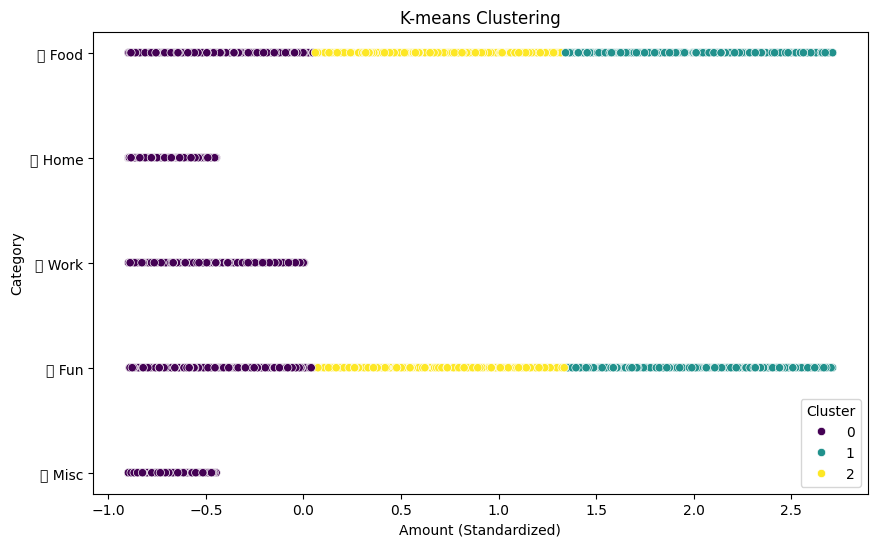

Cluster Centers:
[[ 14.33496907]
 [128.42824808]
 [ 69.91054131]]


In [ ]:
import seaborn as sns
# Read the data from the CSV file
df = pd.read_csv('expenses.csv')

# Drop unnecessary columns
df.drop(['Name', 'Date'], axis=1, inplace=True)

# Standardize the 'Amount' column
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Amount']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Amount', y='Category', hue='Cluster', palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Amount (Standardized)')
plt.ylabel('Category')
plt.legend(title='Cluster')
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))
